In [1]:
%pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 584.8 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 10.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.3/291.3 kB 13.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.2 -> 25.3
[notice] To update, run: /usr/local/Cellar/jupyterlab/4.0.10/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [87]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download('stopwords')
from nltk import word_tokenize
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading package punkt to /Users/jj/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/jj/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/jj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [140]:
def pre_process(text_file, rare_count):
    lowered_text = text_file.lower()
    tokens = word_tokenize(lowered_text)
    stop_words = set(stopwords.words('english'))
    tokens = [w.strip() for w in tokens if w.isalpha() and w not in stop_words]
    
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(w) for w in tokens]
    tokens_df = pd.DataFrame(tokens, columns =['words'])
    tokens_uniques_df = (
        tokens_df['words']
        .value_counts()
        .reset_index(name='count')
        .rename(columns={'index': 'words'})
    )
    print(tokens_uniques_df.dtypes)

    tokens_uniques_df = tokens_uniques_df[tokens_uniques_df['count'] > rare_count]
    tokens_uniques_df = tokens_uniques_df.sort_values(by='count', ascending=False)
    return tokens_uniques_df

with open("war_and_peace.txt", "r") as f:
    wp = f.read() 
rare_count = 50
wp_tokens = pre_process(wp, rare_count)


words    object
count     int64
dtype: object


In [133]:
print(len(wp_tokens))

1046


In [134]:
print(wp_tokens)

        words  count
0        said   2834
1         one   2157
2       pierr   1949
3       princ   1926
4        look   1584
...       ...    ...
1033   offici     51
1032  conceal     51
1031    broke     51
1030    shook     51
1045  mysteri     51

[1046 rows x 2 columns]


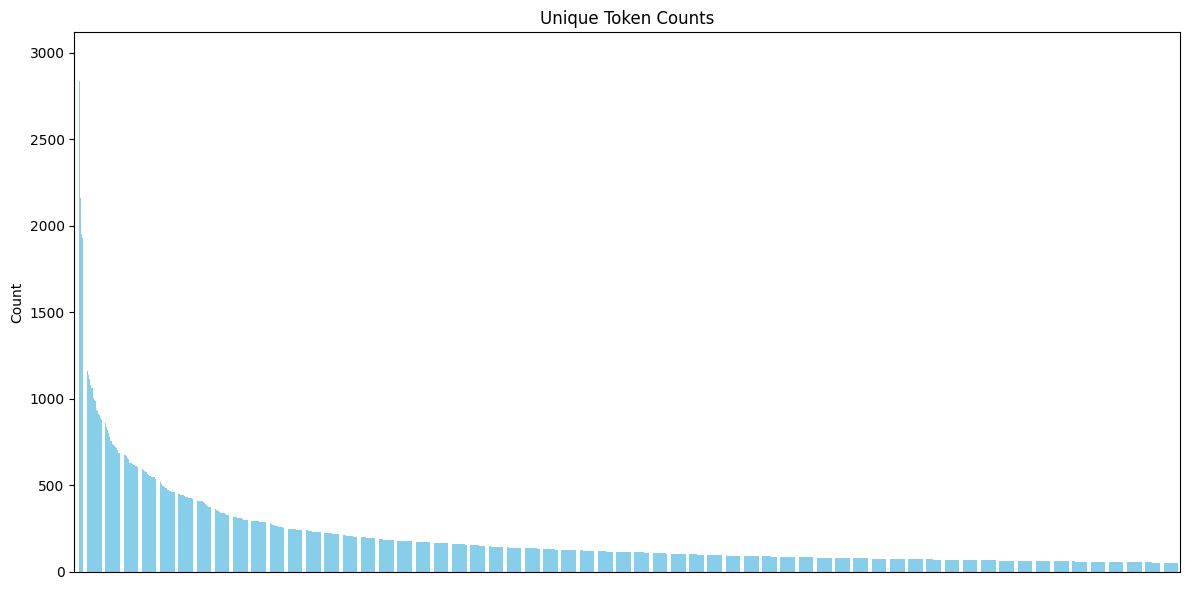

In [149]:
counts = wp_tokens['count'].values
x = np.arange(len(counts))
x_offset = 5
plt.figure(figsize=(12, 6))
plt.bar(x + x_offset, counts, color='skyblue')
plt.ylabel('Count')
plt.title('Unique Token Counts')
plt.ylim(0, counts.max() * 1.1)
plt.xlim(0, len(counts)-1) 
plt.xticks([]) 
plt.tight_layout()
plt.savefig(f"Unique_Counts_with_{rare_count}_removed.png", dpi=300)
plt.show()


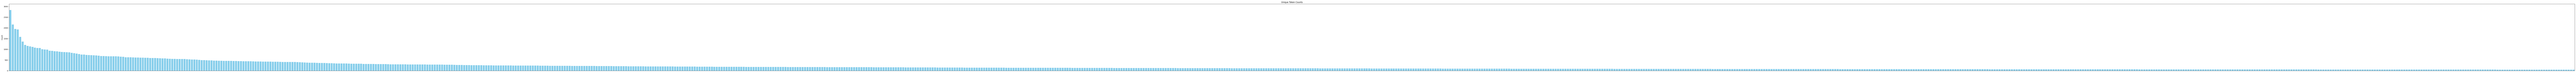

In [150]:
import matplotlib.pyplot as plt
import numpy as np

counts = wp_tokens['count'].values
num_tokens = len(counts)
x = np.arange(num_tokens)

fig_width = max(10, 0.2 * num_tokens)
plt.figure(figsize=(fig_width, 6))

x_offset = 0.5
plt.bar(x + x_offset, counts, color='skyblue')

plt.ylabel('Count')
plt.title('Unique Token Counts')
plt.ylim(0, counts.max() * 1.1)
plt.xlim(0, num_tokens)
plt.xticks([])

plt.tight_layout()
plt.savefig(f"Unique_Counts_total_with_{rare_count}_removed.png", dpi=300)
plt.show()



In [144]:
print(wp_tokens[1:20])

       words  count
1        one   2157
2      pierr   1949
3      princ   1926
4       look   1584
5      would   1360
6    natásha   1205
7        man   1157
8     andrew   1136
9      could   1111
10      face   1078
11      time   1061
12        go   1061
13      know   1003
14       say    991
15       ask    987
16  princess    935
17    rostóv    928
18       see    911
19   thought    902


In [146]:
print(wp_tokens[-20:])

         words  count
1016    whistl     52
1015    prayer     52
1014     scarc     52
1020    clever     52
1038     final     51
1044     enorm     51
1043      sick     51
1042      wine     51
1041     empti     51
1040  circumst     51
1039  hippolyt     51
1034    insist     51
1037   journey     51
1036       mon     51
1035     mason     51
1033    offici     51
1032   conceal     51
1031     broke     51
1030     shook     51
1045   mysteri     51
